In [4]:
# import our libraries
import sqlite3
import pandas as pd
%matplotlib inline

In [5]:
# open a sqlite connection to the metadata file
connection = sqlite3.connect('/shared/Dataport-Data/metadata.sqlite3')

In [16]:
# build and execute query to find homes (dataid) in our pre-prepared and free Austin data set that have solar
# These are the homes in the free Austin data set. We'll want to restrict our homes to those
austin_homes = "(661,1642,2335,2361,2818,3039,3456,3538,4031,4373,4767,5746,6139,7536,7719,7800,7901,7951,"\
    "8156,8386,8565,9019,9160,9922,9278)"

# build the sql query
sql_query = "SELECT dataid, egauge_1min_data_availability, egauge_1min_min_time, egauge_1min_max_time " \
    "FROM metadata WHERE grid = 'yes' "\
    "AND solar = 'yes' AND city = 'Austin' AND dataid in {} "\
    "ORDER by egauge_1min_data_availability DESC".format(austin_homes)

# print out the full query
sql_query

"SELECT dataid, egauge_1min_data_availability, egauge_1min_min_time, egauge_1min_max_time FROM metadata WHERE grid = 'yes' AND solar = 'yes' AND city = 'Austin' AND dataid in (661,1642,2335,2361,2818,3039,3456,3538,4031,4373,4767,5746,6139,7536,7719,7800,7901,7951,8156,8386,8565,9019,9160,9922,9278) ORDER by egauge_1min_data_availability DESC"

In [15]:
# execute the SQL query and put it into a Pandas dataframe
meta_df = pd.read_sql_query(sql_query, connection)
# print out the dataframe
meta_df

,dataid,egauge_1min_data_availability,egauge_1min_min_time,egauge_1min_max_time
0,9019,99%,2012-09-20 19:00:00-05:00,2019-05-20 06:59:00-05:00
1,6139,99%,2012-09-15 19:00:00-05:00,2021-03-28 02:59:00-05:00
2,9160,98%,2012-05-02 19:00:00-05:00,2021-03-28 02:59:00-05:00
3,7536,98%,2012-10-25 19:00:00-05:00,2021-03-28 02:59:00-05:00
4,3456,98%,2012-10-19 19:00:00-05:00,2021-03-28 02:59:00-05:00
5,3039,98%,2012-10-26 19:00:00-05:00,2021-03-28 02:59:00-05:00
6,2818,98%,2012-10-20 19:00:00-05:00,2021-03-28 02:59:00-05:00
7,1642,98%,2012-05-11 19:00:00-05:00,2021-03-28 02:59:00-05:00
8,7719,97%,2014-05-15 00:00:00-05:00,2021-03-28 02:59:00-05:00
9,3538,97%,2014-04-26 00:00:00-05:00,2021-03-28 02:59:00-05:00


In [21]:
# extract dataids to a list of ints
dataids_list = meta_df['dataid'].tolist()

# extract the list of ints into a comma separated string
dataids_str = ','.join([str(i) for i in dataids_list])
dataids_str

'9019,6139,9160,7536,3456,3039,2818,1642,7719,3538,4767,2335,661,8156,4031,4373,9278,2361,7800'

In [25]:
# open a sqlite connection to the 1 minute austin electricity database file
elec_conn = sqlite3.connect('/shared/Dataport-Data/electricity_data/Austin/1minute_data_austin.sqlite3')

In [29]:
# build the sql queries using the string of dataids above
query_jan = "SELECT dataid, localminute, grid, solar FROM '1minute_data_austin' WHERE dataid in ({})"\
    " AND localminute >= '2018-01-01' AND localminute < '2018-01-08'".format(dataids_str)
print(query_jan)

query_july = "SELECT dataid, localminute, grid, solar FROM '1minute_data_austin' WHERE dataid in ({})"\
    " AND localminute >= '2018-07-04' AND localminute < '2018-07-11'".format(dataids_str)
print(query_july)

SELECT dataid, localminute, grid, solar FROM '1minute_data_austin' WHERE dataid in (9019,6139,9160,7536,3456,3039,2818,1642,7719,3538,4767,2335,661,8156,4031,4373,9278,2361,7800) AND localminute >= '2018-01-01' AND localminute < '2018-01-08'
SELECT dataid, localminute, grid, solar FROM '1minute_data_austin' WHERE dataid in (9019,6139,9160,7536,3456,3039,2818,1642,7719,3538,4767,2335,661,8156,4031,4373,9278,2361,7800) AND localminute >= '2018-07-04' AND localminute < '2018-07-11'


In [42]:
# execute the SQL query and put it into a Pandas dataframe
df_jan = pd.read_sql_query(query_jan, elec_conn)
# print out the dataframe
df_jan

,dataid,localminute,grid,solar
0,661,2018-01-01 01:21:00-06,1.806,-0.002
1,661,2018-01-01 01:00:00-06,1.817,-0.002
2,661,2018-01-01 01:01:00-06,1.804,-0.002
3,661,2018-01-01 01:02:00-06,1.761,-0.002
4,661,2018-01-01 01:03:00-06,1.672,-0.002
...,...,...,...,...
191031,9278,2018-01-02 21:25:00-06,13.743,-0.006
191032,9278,2018-01-02 21:26:00-06,1.530,-0.004
191033,9278,2018-01-02 21:27:00-06,1.417,-0.004
191034,9278,2018-01-02 21:28:00-06,10.454,-0.005


In [43]:
# execute the SQL query and put it into a Pandas dataframe
df_july = pd.read_sql_query(query_july, elec_conn)
# print out the dataframe
df_july

,dataid,localminute,grid,solar
0,661,2018-07-05 07:33:00-05,0.596,0.020
1,661,2018-07-06 07:03:00-05,0.563,0.008
2,661,2018-07-06 07:04:00-05,0.559,0.013
3,661,2018-07-06 07:07:00-05,0.544,0.028
4,661,2018-07-06 07:06:00-05,0.549,0.023
...,...,...,...,...
191515,9278,2018-07-10 23:55:00-05,3.805,-0.006
191516,9278,2018-07-10 23:56:00-05,1.420,-0.003
191517,9278,2018-07-10 23:57:00-05,1.406,-0.003
191518,9278,2018-07-10 23:58:00-05,2.025,-0.003


In [44]:
# sum up solar for January
sum_jan = df_jan['solar'].sum()
sum_jan

95430.53700000003

In [45]:
# sum up solar for July
sum_july = df_july['solar'].sum()
sum_july

151911.399

In [46]:
diff = sum_july - sum_jan
perc = diff / sum_jan
perc * 100

59.18531297796215

In [47]:
# convert localminute to pandas datetime type
df_july['datetime'] = pd.to_datetime(df_july['localminute'])
df_jan['datetime'] = pd.to_datetime(df_jan['localminute'])

# set index
df_july = df_july.set_index('datetime')
df_jan = df_jan.set_index('datetime')

In [48]:
# group by day and take the sum per day
group_jan = df_jan.groupby(pd.Grouper(freq='D')).sum()
group_jan

,dataid,grid,solar
datetime,,,
2018-01-01 00:00:00-06:00,136463364,30315.658,9324.994
2018-01-02 00:00:00-06:00,140872320,34470.321,4492.697
2018-01-03 00:00:00-06:00,140872320,9953.600,24254.271
2018-01-04 00:00:00-06:00,140872320,8777.170,18445.470
2018-01-05 00:00:00-06:00,140872320,4643.659,21932.572
2018-01-06 00:00:00-06:00,140872320,13254.199,13187.776
2018-01-07 00:00:00-06:00,140872320,20556.232,3792.757


In [49]:
# group by day and take the sum per day
group_july = df_july.groupby(pd.Grouper(freq='D')).sum()
group_july

,dataid,grid,solar
datetime,,,
2018-07-04 00:00:00-05:00,140872320,41621.314,12522.098
2018-07-05 00:00:00-05:00,140872320,22020.976,29538.169
2018-07-06 00:00:00-05:00,140872320,43229.412,27304.556
2018-07-07 00:00:00-05:00,140872320,36482.976,20625.208
2018-07-08 00:00:00-05:00,140872320,33011.891,25713.398
2018-07-09 00:00:00-05:00,140872320,32738.361,7220.602
2018-07-10 00:00:00-05:00,140872320,24440.576,28987.368


(0.0, 30000.0)

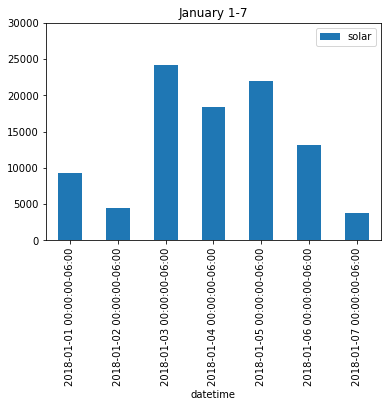

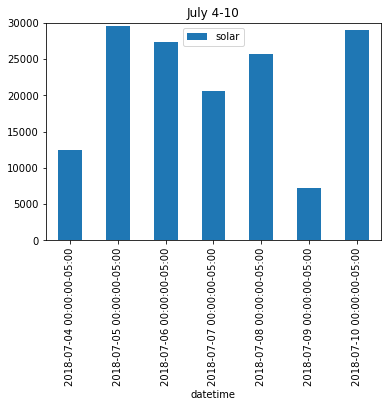

In [58]:
# plot solar setting the max y value to 30k for both
ax1 = group_jan.plot.bar(y='solar', title='January 1-7')
ax1.set_ylim(0, 30000)

ax2 = group_july.plot.bar(y='solar', title='July 4-10')
ax2.set_ylim(0, 30000)

In [69]:
# create a python dictionary with the values from both Jan and July
days_data = {'January':  group_jan['solar'].to_list(), 'July': group_july['solar'].to_list()}
days_data

{'January': [9324.99400000043,
  4492.697000000248,
  24254.27099999551,
  18445.46999999589,
  21932.57199999548,
  13187.775999999796,
  3792.757000000085],
 'July': [12522.098000000016,
  29538.168999998114,
  27304.555999997985,
  20625.207999997885,
  25713.39799999763,
  7220.602000000205,
  28987.36799999779]}

In [70]:
# create new dataframe with that dictionary
days_df = pd.DataFrame(days_data)
days_df

,January,July
0,9324.994,12522.098
1,4492.697,29538.169
2,24254.271,27304.556
3,18445.470,20625.208
4,21932.572,25713.398
5,13187.776,7220.602
6,3792.757,28987.368


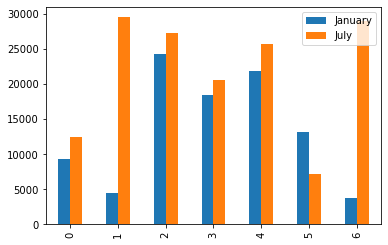

In [71]:
# plot them together
days_df.plot.bar()